## Read Data

In [34]:
# Import Lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import pickle
import pandas as pd
import numpy as np
# Read data
from reactionrnn import reactionrnn
import re

dataset = pd.read_csv('0112_all_videos_63215_sentiment.csv')
dataset = dataset.dropna(how='any',axis=0) 

# Encode data 

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
dataset['User_Name'] = LabelEncoder().fit_transform(dataset['User_Name'].astype(str))
dataset['Category'] = LabelEncoder().fit_transform(dataset['Category'].astype(str))

channel = dataset['Channel_Type'].values.reshape(-1,1, order='F')
print (channel)
onehot_channel = OneHotEncoder().fit_transform(channel)
onehot_channel = pd.DataFrame(onehot_channel,index=onehot_channel[:,0])
onehot_channel
#dataset = pd.concat([dataset, onehot_channel], axis=1, join_axes=[dataset.index])


dataset

[['Entertainment']
 ['Entertainment']
 ['Entertainment']
 ...
 ['Education']
 ['Education']
 ['Education']]


ValueError: DataFrame constructor not properly called!

# Data analysis

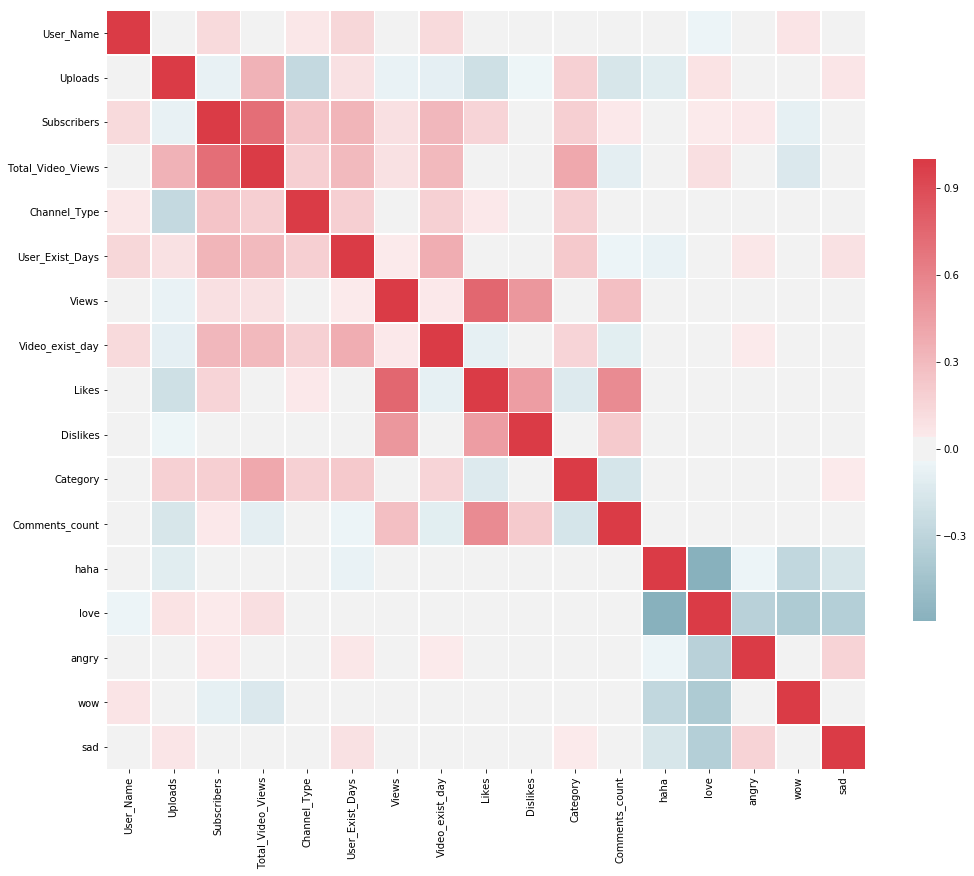

In [12]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(17, 17))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})        


# Feature selection and Dataset generation 

In [34]:
#Label ground truth
label = data['Views']

#features
sub_num = dataset['Subscribers']
video_exist_day = dataset['Video_exist_day']
like = dataset['Likes']
dislike = dataset['Dislikes']
comment = dataset['Comments_count']
filtered_data = pd.concat([sub_num, video_exist_day, like, dislike, comment], axis=1) #, like, df4, dislike, comment
filtered_data = filtered_data.values
filtered_data[:,1] = filtered_data[:,1] + 13
train_feature, val_feature, train_label, val_label = train_test_split(
    filtered_data,
    label,
    random_state=0,
    test_size=0.1)

filtered_data

array([[2810887,       9,   42207,    1139,    2277],
       [2810887,      24,   24249,     721,    1713],
       [2810887,      39,   36126,    1147,    3001],
       ...,
       [ 267955,     423,    1520,      55,     418],
       [ 267955,     428,     903,      18,     186],
       [ 267955,     430,     393,      11,      53]])

# XGBClassfier Training

In [35]:
# xgb = XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

xgb = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 1,
                    max_depth= 9,
                    subsample= 0.9,
                    colsample_bytree= 0.9,
                    tree_method= 'exact',
                    learning_rate=0.05,
                    n_estimators=1000,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha= 100,
                    seed=27)
# param_test = {
#     'n_estimators':[50, 100, 200, 500,1000],
#     'learning_rate':[0.05, 0.1,0.2]
# }
# gsearch = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
#                     objective= 'reg:linear',
#                     eval_metric='rmse',
#                     gamma = 0,
#                     min_child_weight= 1,
#                     max_depth= 9,
#                     subsample= 0.9,
#                     colsample_bytree= 0.9,
#                     tree_method= 'exact',
#                     learning_rate=0.1,
#                     n_estimators=100,
#                     nthread=4,
#                     scale_pos_weight=1,
#                     reg_alpha= 100,
#                     seed=27),
#                     param_grid = param_test, scoring='neg_mean_absolute_error',n_jobs=8,iid=False, cv=5)
# gsearch.fit(train_feature,train_label, verbose = True)
# print ("cv_results_")
# print (gsearch.cv_results_)
# print ("Best params:")
# print (gsearch.best_params_)
# print ("Best Scores:")
# print (gsearch.best_score_)

xgb.fit(train_feature, train_label, verbose = True)

train_pred = xgb.predict(train_feature)
val_pred = xgb.predict(val_feature)


print ("Train Mean Absolute Error:" + str(mean_absolute_error(train_pred, train_label)))
print ("Val Mean Absolute Error:" + str(mean_absolute_error(val_pred, val_label)))

Train Mean Absolute Error:24414.65048518096
Val Mean Absolute Error:71306.1806702407


In [37]:
val_label = np.array(val_label)
val_label = val_label.reshape(-1,1)
val_pred = val_pred.reshape(-1,1)
np.shape(val_label)
test = np.concatenate((val_label, val_pred),axis=1)
print (test[0:50,:])
test = np.concatenate((val_feature, test),axis=1)
print (test[0:50,:])



[[ 1.33434000e+05  1.25870633e+05]
 [ 1.89422000e+05  2.10872703e+05]
 [ 1.45152000e+05  1.17998586e+05]
 [ 2.51551000e+05  2.44771281e+05]
 [ 3.93490000e+04  4.69570820e+04]
 [ 2.34700000e+03  4.27835645e+03]
 [ 1.04176000e+05  8.11531328e+04]
 [ 3.52905000e+05  3.44716188e+05]
 [ 6.51442000e+05  6.96613062e+05]
 [ 3.24300000e+03  9.15829297e+03]
 [ 5.43733000e+05  4.74972750e+05]
 [ 5.85575000e+05  4.42350125e+05]
 [ 7.85109000e+05  6.75641812e+05]
 [ 3.38700000e+03  7.62009521e+03]
 [ 1.74200000e+04  1.92042188e+04]
 [ 6.12310000e+04  6.72979453e+04]
 [ 1.35150000e+05  1.02660695e+05]
 [ 2.59270000e+04  2.06659941e+04]
 [ 5.08300000e+04  3.89076445e+04]
 [ 4.36200000e+04  2.46386074e+04]
 [ 2.66539500e+06  6.41303700e+06]
 [ 2.26330000e+04  2.50879590e+04]
 [ 1.84500000e+03 -1.52336536e+03]
 [ 3.20000000e+04  3.73574609e+04]
 [ 7.35000000e+02  1.95158667e+03]
 [ 1.55500000e+03 -1.10574036e+03]
 [ 3.69900000e+04  9.33694297e+04]
 [ 1.38223000e+05  1.18738844e+05]
 [ 3.25100000e+03  2

In [18]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']